   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Pressure9am  \
0           30.0         SW         NW           6.0  ...       1019.7   
1           39.0          E          W           4.0  ...       1012.4   
2           85.0          N        NNE           6.0  ...       1009.5   
3           54.0        WNW          W          30.0  ...       1005.5   
4           50.0        SSE        ESE          20.0  ...       1018.3   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1015.0         7         7     14.4     23.6         No      3

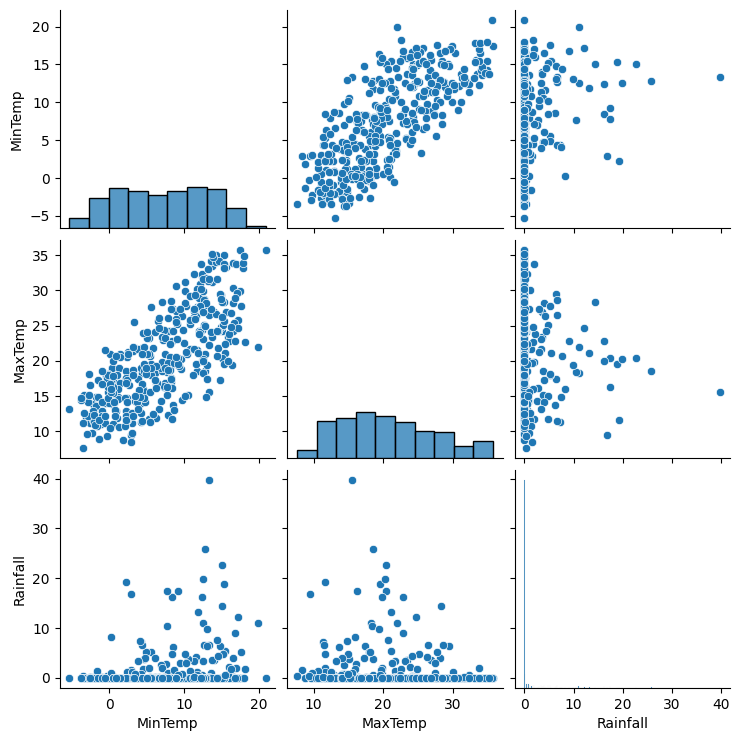

<ipython-input-9-2c0dc92a1d9e>:24: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


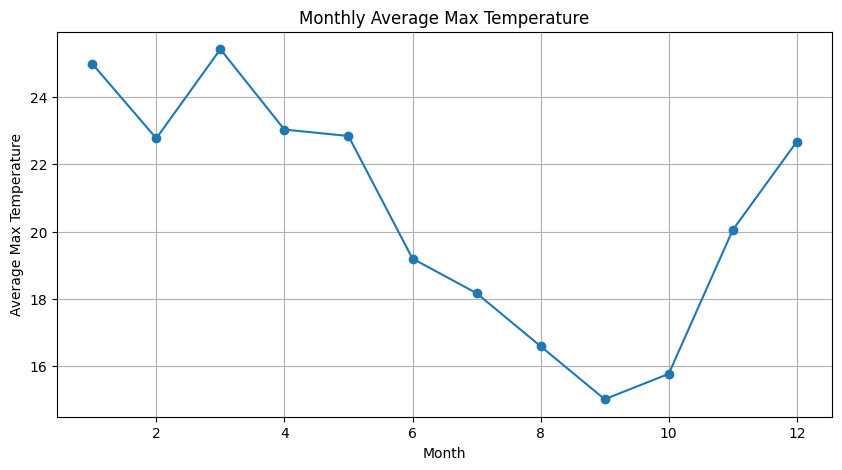

Mean Squared Error for Rainfall Prediction: 37.0768456005826
Highest rainfall month: 3, Lowest rainfall month: 9


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Load the Data
df = pd.read_csv('weather.csv')

# Step 2: Data Exploration
print(df.head())
print(df.info())
print(df.describe())

# Step 3: Data Visualization
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall']])
plt.show()

# Step 4: Feature Engineering (if needed)

# Step 5: Data Analysis (analyze each term)
# Example: Calculate average MaxTemp by month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
monthly_avg_max_temp = df.groupby('Month')['MaxTemp'].mean()

# Step 6: Data Visualization (Part 2)
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_max_temp.index, monthly_avg_max_temp.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Max Temperature')
plt.title('Monthly Average Max Temperature')
plt.grid(True)
plt.show()

# Step 7: Advanced Analysis (e.g., predict Rainfall)
# Prepare the data for prediction
X = df[['MinTemp', 'MaxTemp']]
y = df['Rainfall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and calculate the Mean Squared Error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse}')

# Step 8: Conclusions and Insights (analyze each term)
# Example: Identify the highest and lowest rainfall months
highest_rainfall_month = monthly_avg_max_temp.idxmax()
lowest_rainfall_month = monthly_avg_max_temp.idxmin()
print(f'Highest rainfall month: {highest_rainfall_month}, Lowest rainfall month: {lowest_rainfall_month}')

# Step 9: Communication (Optional)

# Step 10: Future Work (Optional)

# Save or display the results and potentially export to a report or presentation.
